Name: Xuecheng Liu


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [0]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL)
# remove row names from the frist column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,1:]

mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_well = np.array(mRNA_well_df)[:,1:8896]
mRNA_well = mRNA_well.astype('float')

mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.array(mRNA_poor_df)[:,1:8896]


In [0]:
plot_r2_well=[]
plot_r2_poor=[]
plot_r2_well_train=[]
plot_r2_poor_train=[]
plot_rmse_well=[]
plot_rmse_poor=[]


In [0]:
# evaluate over 35 mRNA_well sample
for i in range(35):
  r2_well = []
  rmse_well = []
  r2_well_train = []
  # iterate 10 times over each sample
  for j in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(miR,mRNA_well[i],test_size = 0.2,shuffle = True)
    lm_well = LinearRegression()
    lm_well.fit(X_train,Y_train)

    # validate r2 and rmse over testing set
    Y_hat = lm_well.predict(X_test)
    r2_well.append(r2_score(Y_test,Y_hat))
    rmse_well.append(np.sqrt(metrics.mean_squared_error(Y_test, Y_hat)))

    # validate r2 over training set
    Y_hat_train = lm_well.predict(X_train)
    r2_well_train.append(r2_score(Y_train,Y_hat_train))
    
  # add r2 and rmse for plotting over well-expressed
  plot_r2_well.append(np.mean(r2_well))
  plot_rmse_well.append(np.mean(rmse_well))
  plot_r2_well_train.append(np.mean(r2_well_train))

In [0]:
# evaluate over 20 mRNA_poor sample
for i in range(20):
  r2_well = []
  rmse_well = []
  r2_well_train = []
  # iterate 10 times for each sample
  for j in range(10):
    X_train, X_test, Z_train, Z_test = train_test_split(miR,mRNA_poor[i],test_size = 0.2,shuffle = True)
    lm_poor = LinearRegression()
    lm_poor.fit(X_train,Z_train)
    Z_hat = lm_poor.predict(X_test)
    r2_poor.append(r2_score(Z_test,Z_hat))
    rmse_poor.append(np.sqrt(metrics.mean_squared_error(Z_test, Z_hat)))
    Z_hat_train = lm_poor.predict(X_train)
    r2_poor_train.append(r2_score(Z_train,Z_hat_train))
    
    # add r2 and rmse for plotting over poor-expressed
  plot_r2_poor.append(np.mean(r2_poor))
  plot_rmse_poor.append(np.mean(rmse_poor))
  plot_r2_poor_train.append(np.mean(r2_poor_train))

**The next section will report Part 1 Q1**

In [61]:
print('###R2 and RMSE for well-expressed sample###')
print('The mean of R2 is:',np.mean(plot_r2_well))
print('The standard deviation of R2 is:',np.std(plot_r2_well))
print('THe mean of RMSE is:',np.mean(plot_rmse_well))
print('The standard deviation of RMSE is:',np.std(plot_rmse_well))
print('---------------------------------------------------')

print('###R2 and RMSE for poor-expressed sample###')
print('The mean of R2 is:',np.mean(plot_r2_poor))
print('The standard deviation of R2 is:',np.std(plot_r2_poor))
print('THe mean of RMSE is:',np.mean(plot_rmse_poor))
print('The standard deviation of RMSE is:',np.std(plot_rmse_poor))
print('---------------------------------------------------')

###R2 and RMSE for well-expressed sample###
The mean of R2 is: 0.8298123115697553
The standard deviation of R2 is: 0.03724513336756385
THe mean of RMSE is: 0.9544496242072802
The standard deviation of RMSE is: 0.31320201713956014
---------------------------------------------------
###R2 and RMSE for poor-expressed sample###
The mean of R2 is: 0.044265995929233304
The standard deviation of R2 is: 0.001973340451545168
THe mean of RMSE is: 0.3524959225085423
The standard deviation of RMSE is: 0.10656981860305632
---------------------------------------------------


**The next section is for Part 1 Q2**

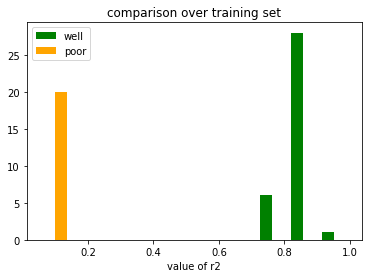

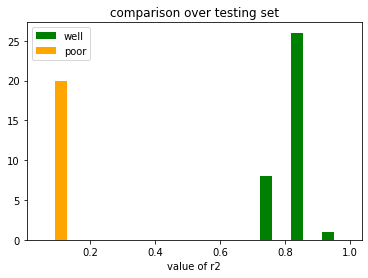

In [62]:
plt.xlabel('value of r2')
plt.title('comparison over training set')
plt.hist([plot_r2_well_train, plot_r2_poor_train],color=['green','orange'],label=['well','poor'])
plt.legend()
plt.show()

plt.xlabel('value of r2')
plt.title('comparison over testing set')
plt.hist([plot_r2_well, plot_r2_poor],color=['green','orange'],label=['well','poor'])
plt.legend()
plt.show()



**Based on the histograms I got, well-expressed sample has a much higher R2 
score than poor-expressed, and the average value of R2 score for well-expressed gene is around 0.83, which means our model fits well**

***The following section is for part 1 Q3***

In [0]:
tissue_URL = 'https://raw.githubusercontent.com/efosler/cse5522data/master/cancerType-x-Categorical.csv'
tissue_df = pd.read_csv(tissue_URL)
tissue_df = pd.get_dummies(tissue_df).iloc[:,2:]
new_features = pd.concat([miR_df,tissue_df],axis=1).iloc[:,1:]

In [0]:
plot_r2_well=[]
plot_r2_poor=[]
plot_rmse_well=[]
plot_rmse_poor=[]

In [0]:
# evaluate over 35 mRNA_well sample
for i in range(35):
  r2_well = []
  rmse_well = []
  # iterate 10 times over each sample
  for j in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(new_features,mRNA_well[i],test_size = 0.2,shuffle = True)
    lm_well = LinearRegression()
    lm_well.fit(X_train,Y_train)

    # validate r2 and rmse over testing set
    Y_hat = lm_well.predict(X_test)
    r2_well.append(r2_score(Y_test,Y_hat))
    rmse_well.append(np.sqrt(metrics.mean_squared_error(Y_test, Y_hat)))

    
    
  # add r2 and rmse for plotting over well-expressed
  plot_r2_well.append(np.mean(r2_well))
  plot_rmse_well.append(np.mean(rmse_well))
  

In [0]:
# evaluate over 20 mRNA_poor sample
for i in range(20):
  r2_poor = []
  rmse_poor = []
  
  # iterate 10 times for each sample
  for j in range(10):
    X_train, X_test, Z_train, Z_test = train_test_split(new_features,mRNA_poor[i],test_size = 0.2,shuffle = True)
    lm_poor = LinearRegression()
    lm_poor.fit(X_train,Z_train)
    Z_hat = lm_poor.predict(X_test)
    r2_poor.append(r2_score(Z_test,Z_hat))
    rmse_poor.append(np.sqrt(metrics.mean_squared_error(Z_test, Z_hat)))
    Z_hat_train = lm_poor.predict(X_train)
    
    
    # add r2 and rmse for plotting over poor-expressed
  plot_r2_poor.append(np.mean(r2_poor))
  plot_rmse_poor.append(np.mean(rmse_poor))
  

In [73]:
print('###R2 and RMSE for well-expressed sample###')
print('The mean of R2 is:',np.mean(plot_r2_well))
print('The standard deviation of R2 is:',np.std(plot_r2_well))
print('THe mean of RMSE is:',np.mean(plot_rmse_well))
print('The standard deviation of RMSE is:',np.std(plot_rmse_well))
print('---------------------------------------------------')

print('###R2 and RMSE for poor-expressed sample###')
print('The mean of R2 is:',np.mean(plot_r2_poor))
print('The standard deviation of R2 is:',np.std(plot_r2_poor))
print('THe mean of RMSE is:',np.mean(plot_rmse_poor))
print('The standard deviation of RMSE is:',np.std(plot_rmse_poor))
print('---------------------------------------------------')

###R2 and RMSE for well-expressed sample###
The mean of R2 is: 0.8861045425509345
The standard deviation of R2 is: 0.029740068253331652
THe mean of RMSE is: 0.7899844093486387
The standard deviation of RMSE is: 0.28360924127074016
---------------------------------------------------
###R2 and RMSE for poor-expressed sample###
The mean of R2 is: 0.09661927311714012
The standard deviation of R2 is: 0.03524647365443211
THe mean of RMSE is: 0.2785937138464946
The standard deviation of RMSE is: 0.35945351123344954
---------------------------------------------------


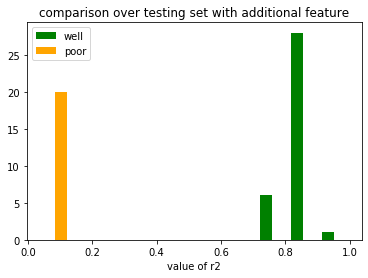

In [68]:
plt.xlabel('value of r2')
plt.title('comparison over testing set with additional feature')
plt.hist([plot_r2_well, plot_r2_poor],color=['green','orange'],label=['well','poor'])
plt.legend()
plt.show()

**As you can see from the reported data and histograms, the mean of R2
score with one additional feature increased both for well-expressed sample and poor-expressed sample.Also, the value of RMSE decreased for both samples.Thus, this additional feature helps us make better predictions**